In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load dataset
data = pd.read_csv('PCAMODIFY.csv')

In [5]:
# Step 2: Map categorical responses to numerical values
mapping = {
    'Strongly agree': 5,
    'Agree': 4,
    'Neutral': 3,
    'Disagree': 2,
    'Strongly disagree': 1
}
data_numeric = data.replace(mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_11716\2678511462.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_numeric = data.replace(mapping)


In [9]:
# Step 3: Standardize the data (PCA requires the data to be on the same scale)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_numeric)

In [11]:
# Step 4: Split the data into 80% training and 20% testing
train_data, test_data = train_test_split(data_numeric, test_size=0.2, random_state=42)
train_standardized = scaler.fit_transform(train_data)
test_standardized = scaler.transform(test_data)  # Use the same scaler for the test set

In [13]:
# Step 5: Perform PCA on the training data and transform the test data using the same PCA model
pca = PCA(n_components=2)
pca.fit(train_standardized)
train_pca = pca.transform(train_standardized)
test_pca = pca.transform(test_standardized)

In [15]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
# Cumulative Explained Variance
cumulative_variance = explained_variance.cumsum()
# Extract loadings to find the questions influencing the components
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(2)], index=data_numeric.columns)

In [17]:
# Top 2 questions influencing PC1 for Train Data
top_2_train = loadings['PC1'].abs().sort_values(ascending=False).head(2)

In [19]:
# Top 10 questions influencing PC1 for Train Data
top_10_train = loadings['PC1'].abs().sort_values(ascending=False).head(10)

In [21]:
# Display results for training data
print("Explained Variance by Each Principal Component:", explained_variance)
print("Cumulative Explained Variance:", cumulative_variance)

print("\nTop 2 Questions Influencing PCA (Train Data):")
for question, loading in zip(top_2_train.index, top_2_train.values):
    print(f"{question}: {loading:.4f}")

print("\nTop 10 Questions Influencing PCA (Train Data):")
for question, loading in zip(top_10_train.index, top_10_train.values):
    print(f"{question}: {loading:.4f}")

Explained Variance by Each Principal Component: [0.20194561 0.16285107]
Cumulative Explained Variance: [0.20194561 0.36479668]

Top 2 Questions Influencing PCA (Train Data):
Private institutes have high experienced professor than government institutes. : 0.3067
Private institutes have better future for the student rather than government institutes. : 0.2979

Top 10 Questions Influencing PCA (Train Data):
Private institutes have high experienced professor than government institutes. : 0.3067
Private institutes have better future for the student rather than government institutes. : 0.2979
Private institutes are effective in terms of studies than government institutes. : 0.2920
Private institutes provide multiple research opportunities for students than government institutes. : 0.2807
Holistic development (including academics, extracurricular activities, personal growth, and social skills) in private institute’s is better than government institutes? : 0.2783
Private institute’s students a

In [23]:
# Step 6: Display results for test data
print("\nTop 2 Questions Influencing PCA (Test Data):")
top_2_test = loadings['PC1'].abs().sort_values(ascending=False).head(2)
for question, loading in zip(top_2_test.index, top_2_test.values):
    print(f"{question}: {loading:.4f}")

print("\nTop 10 Questions Influencing PCA (Test Data):")
top_10_test = loadings['PC1'].abs().sort_values(ascending=False).head(10)
for question, loading in zip(top_10_test.index, top_10_test.values):
    print(f"{question}: {loading:.4f}")


Top 2 Questions Influencing PCA (Test Data):
Private institutes have high experienced professor than government institutes. : 0.3067
Private institutes have better future for the student rather than government institutes. : 0.2979

Top 10 Questions Influencing PCA (Test Data):
Private institutes have high experienced professor than government institutes. : 0.3067
Private institutes have better future for the student rather than government institutes. : 0.2979
Private institutes are effective in terms of studies than government institutes. : 0.2920
Private institutes provide multiple research opportunities for students than government institutes. : 0.2807
Holistic development (including academics, extracurricular activities, personal growth, and social skills) in private institute’s is better than government institutes? : 0.2783
Private institute’s students are groomed enough than government institutes. : 0.2728
Private institute’s syllabus is better than the government institute.: 0.2

<Figure size 800x500 with 0 Axes>

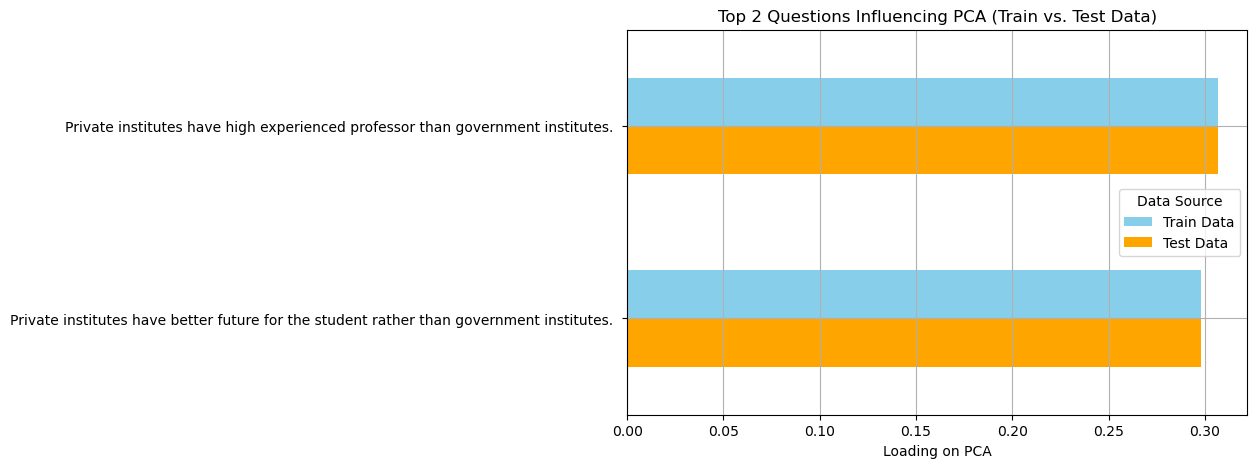

In [25]:
# Graph for Combined Top 2 Questions Influencing PCA (Train and Test Data)
plt.figure(figsize=(8, 5))
top_2_combined = pd.DataFrame({
    'Train Data': top_2_train.values,
    'Test Data': top_2_test.values
}, index=top_2_train.index)
top_2_combined.plot(kind='barh', color=['skyblue', 'orange'], figsize=(8, 5))
plt.xlabel('Loading on PCA')
plt.title('Top 2 Questions Influencing PCA (Train vs. Test Data)')
plt.legend(title='Data Source')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

<Figure size 1000x700 with 0 Axes>

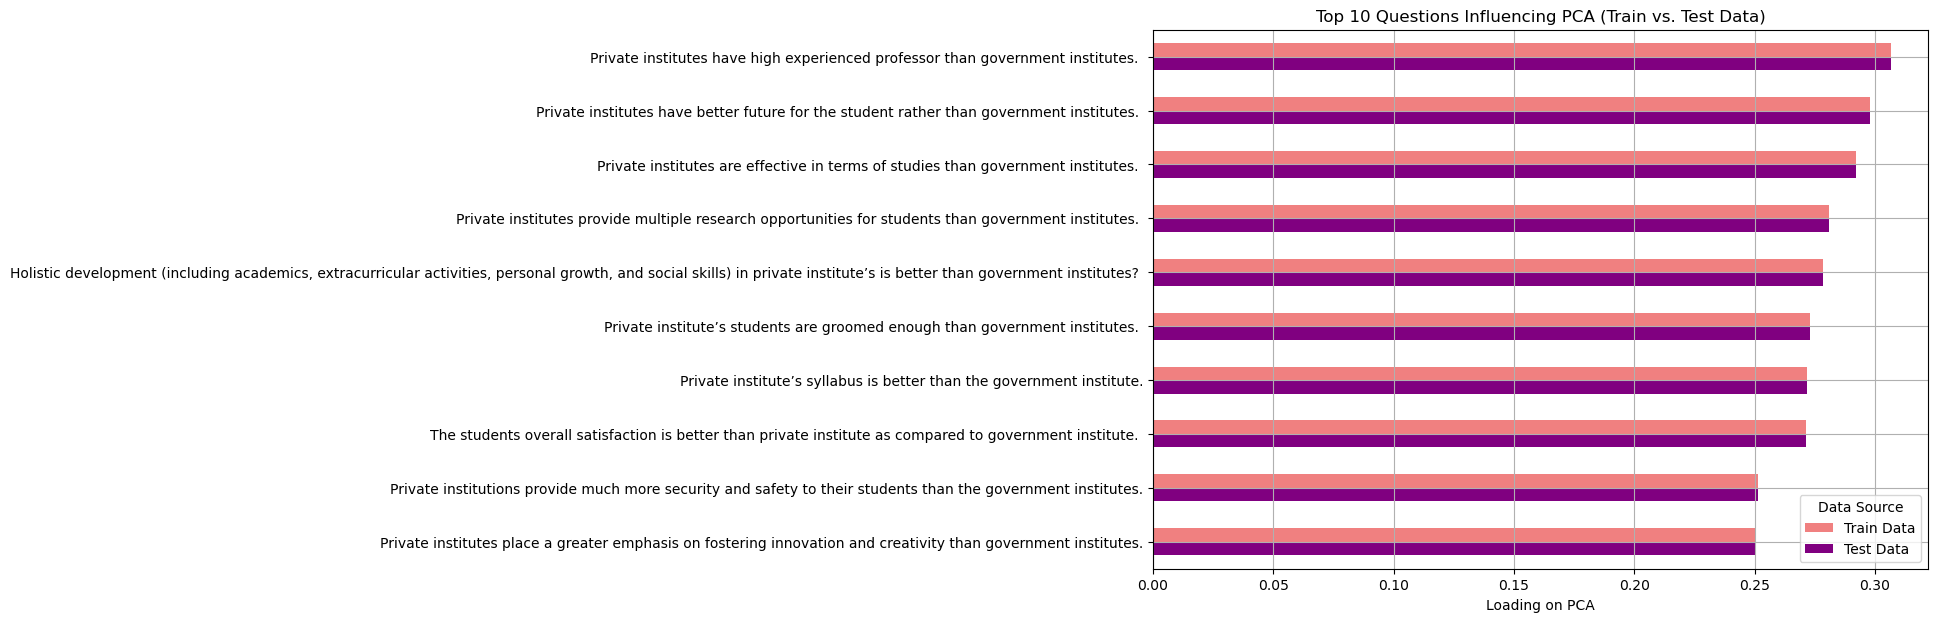

In [27]:
# Graph for Combined Top 10 Questions Influencing PCA (Train and Test Data)
plt.figure(figsize=(10, 7))
top_10_combined = pd.DataFrame({
    'Train Data': top_10_train.values,
    'Test Data': top_10_test.values
}, index=top_10_train.index)
top_10_combined.plot(kind='barh', color=['lightcoral', 'purple'], figsize=(10, 7))
plt.xlabel('Loading on PCA')
plt.title('Top 10 Questions Influencing PCA (Train vs. Test Data)')
plt.legend(title='Data Source')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

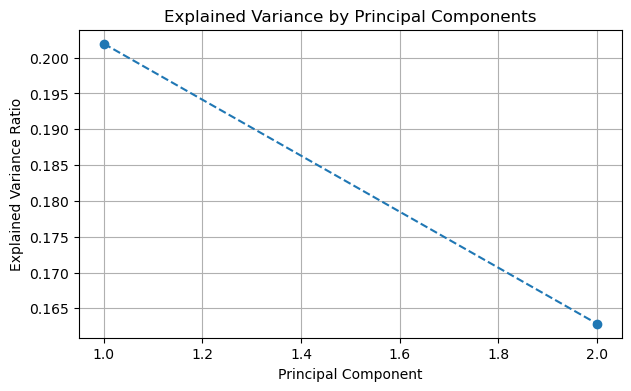

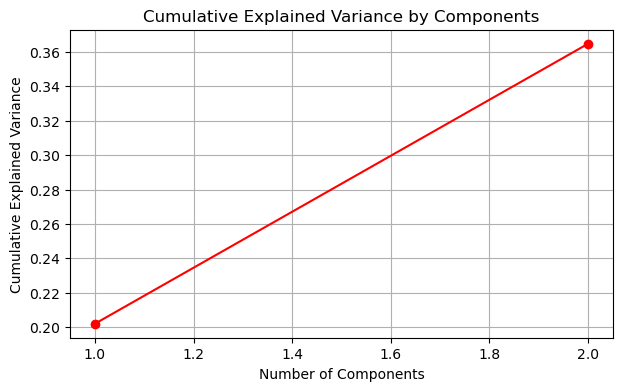

In [29]:
# Step 7: Plotting Explained Variance and Cumulative Explained Variance
plt.figure(figsize=(7, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.grid(True)
plt.show()

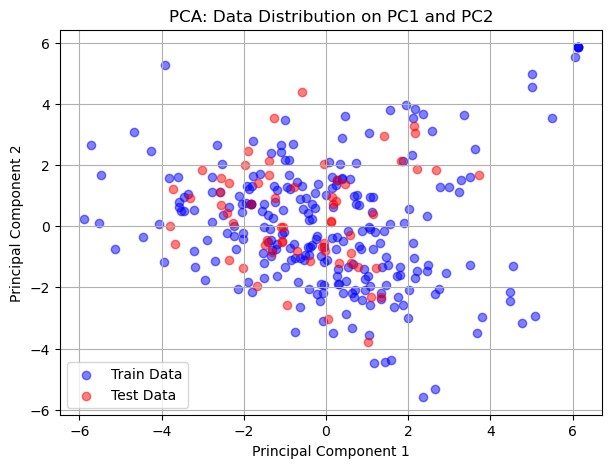

In [31]:
# Step 8: PCA Data Distribution for Training and Testing Data
plt.figure(figsize=(7, 5))
plt.scatter(train_pca[:, 0], train_pca[:, 1], alpha=0.5, label='Train Data', c='b')
plt.scatter(test_pca[:, 0], test_pca[:, 1], alpha=0.5, label='Test Data', c='r')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data Distribution on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()